[View in Colaboratory](https://colab.research.google.com/github/redcican/Master-Thesis/blob/master/09_Advanced_Optimization_Algorithms_FashionMnist.ipynb)

# 09 Comparison of Different Advanced Optimization Algorithms Using FashionMNIST


## 1. Introduction to the Dataset

Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes

Labels:


*   0 : T-shirt/top
*   1 : Trouser
*   2 : Pullover
*   3 : Dress
*   4 : Coat
*   5 : Sandal
*   6 : Shirt
*   7 : Sneake
*   8 : Bag
*   9 : Ankle Boot











## 2. Data Preprocessing

In [5]:
from keras.utils import to_categorical
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving fashion-mnist_train.csv to fashion-mnist_train.csv
User uploaded file "fashion-mnist_train.csv" with length 133047193 bytes


In [3]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving fashion-mnist_test.csv to fashion-mnist_test.csv
User uploaded file "fashion-mnist_test.csv" with length 22176691 bytes


In [0]:
data_train = pd.read_csv('fashion-mnist_train.csv')
data_test = pd.read_csv('fashion-mnist_test.csv')

In [0]:
img_rows, img_cols = 28, 28
input_shpae = (img_rows, img_cols, 1)

X = np.array(data_train.iloc[:,1:])
y = to_categorical(np.array(data_train.iloc[:,0]))

In [0]:
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=.2, random_state=13)

In [0]:
X_test = np.array(data_test.iloc[:,1:])
y_test = to_categorical(np.array(data_test.iloc[:,0]))

In [0]:
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
X_val = X_val.reshape(X_val.shape[0], img_rows, img_cols, 1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_val = X_val.astype('float32')
X_train /= 255
X_test /= 255
X_val /= 255

## 3. Building the Neural Network

In [0]:
import time
import seaborn as sns
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import optimizers
from keras.layers.normalization import BatchNormalization

In [0]:
batch_size = 256
num_classes = 10
epochs = 100
img_rows, img_cols = 28, 28

In [0]:
def model(optimizer):
  model = Sequential()
  model.add(Conv2D(32, kernel_size=(3,3), activation='relu',
                   kernel_initializer='he_normal',input_shape=input_shpae))
  model.add(MaxPooling2D(2,2))
  model.add(Dropout(0.25))
  model.add(Conv2D(64, (3,3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.25))
  model.add(Conv2D(128,(3,3), activation='relu'))
  model.add(Dropout(0.4))
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dropout(0.3))
  model.add(Dense(num_classes,activation='softmax'))
  
  model.compile(loss='categorical_crossentropy',
               optimizer=optimizer,metrics=['accuracy'])
  
  return model

### 3.1 Optimizer = vanilla SGD with learning rate = 0.01




In [0]:
vanilla_sgd = optimizers.SGD(lr=0.01, decay=0, momentum=0, nesterov=False)

In [16]:
start = time.time()
model_1 = model(vanilla_sgd)
model_1_history = model_1.fit(X_train, y_train,
                             batch_size = batch_size,
                             epochs = epochs,
                             verbose = 2,
                             validation_data = (X_val, y_val))
print('@ Total Time Spent: %.2f seconds' %(time.time()-start))

Train on 48000 samples, validate on 12000 samples
Epoch 1/100
 - 6s - loss: 1.7955 - acc: 0.3438 - val_loss: 1.1698 - val_acc: 0.6159
Epoch 2/100
 - 4s - loss: 1.1477 - acc: 0.5644 - val_loss: 0.9049 - val_acc: 0.6900
Epoch 3/100
 - 4s - loss: 0.9639 - acc: 0.6356 - val_loss: 0.8085 - val_acc: 0.7133
Epoch 4/100
 - 4s - loss: 0.8778 - acc: 0.6685 - val_loss: 0.7606 - val_acc: 0.7272
Epoch 5/100
 - 4s - loss: 0.8269 - acc: 0.6867 - val_loss: 0.7236 - val_acc: 0.7337
Epoch 6/100
 - 4s - loss: 0.7890 - acc: 0.6990 - val_loss: 0.6948 - val_acc: 0.7443
Epoch 7/100
 - 4s - loss: 0.7585 - acc: 0.7115 - val_loss: 0.6656 - val_acc: 0.7527
Epoch 8/100
 - 4s - loss: 0.7373 - acc: 0.7219 - val_loss: 0.6502 - val_acc: 0.7563
Epoch 9/100
 - 4s - loss: 0.7167 - acc: 0.7268 - val_loss: 0.6347 - val_acc: 0.7645
Epoch 10/100
 - 4s - loss: 0.6978 - acc: 0.7333 - val_loss: 0.6172 - val_acc: 0.7672
Epoch 11/100
 - 4s - loss: 0.6860 - acc: 0.7394 - val_loss: 0.6050 - val_acc: 0.7716
Epoch 12/100
 - 4s - los

 - 4s - loss: 0.5398 - acc: 0.7960 - val_loss: 0.4791 - val_acc: 0.8246
Epoch 35/100
 - 4s - loss: 0.5358 - acc: 0.7985 - val_loss: 0.4766 - val_acc: 0.8186
Epoch 36/100
 - 4s - loss: 0.5303 - acc: 0.7992 - val_loss: 0.4698 - val_acc: 0.8258
Epoch 37/100
 - 4s - loss: 0.5290 - acc: 0.8020 - val_loss: 0.4693 - val_acc: 0.8265
Epoch 38/100
 - 4s - loss: 0.5283 - acc: 0.8019 - val_loss: 0.4686 - val_acc: 0.8273
Epoch 39/100
 - 4s - loss: 0.5251 - acc: 0.8020 - val_loss: 0.4620 - val_acc: 0.8302
Epoch 40/100
 - 4s - loss: 0.5238 - acc: 0.8066 - val_loss: 0.4633 - val_acc: 0.8295
Epoch 41/100
 - 4s - loss: 0.5209 - acc: 0.8044 - val_loss: 0.4615 - val_acc: 0.8310
Epoch 42/100
 - 4s - loss: 0.5156 - acc: 0.8074 - val_loss: 0.4571 - val_acc: 0.8301
Epoch 43/100
 - 4s - loss: 0.5165 - acc: 0.8062 - val_loss: 0.4537 - val_acc: 0.8342
Epoch 44/100
 - 4s - loss: 0.5125 - acc: 0.8081 - val_loss: 0.4529 - val_acc: 0.8354
Epoch 45/100
 - 4s - loss: 0.5073 - acc: 0.8110 - val_loss: 0.4512 - val_acc: 

Epoch 68/100
 - 4s - loss: 0.4641 - acc: 0.8274 - val_loss: 0.4104 - val_acc: 0.8502
Epoch 69/100
 - 4s - loss: 0.4635 - acc: 0.8304 - val_loss: 0.4062 - val_acc: 0.8501
Epoch 70/100
 - 4s - loss: 0.4568 - acc: 0.8286 - val_loss: 0.4027 - val_acc: 0.8511
Epoch 71/100
 - 4s - loss: 0.4581 - acc: 0.8316 - val_loss: 0.4046 - val_acc: 0.8520
Epoch 72/100
 - 4s - loss: 0.4571 - acc: 0.8296 - val_loss: 0.4033 - val_acc: 0.8518
Epoch 73/100
 - 4s - loss: 0.4553 - acc: 0.8313 - val_loss: 0.4013 - val_acc: 0.8525
Epoch 74/100
 - 4s - loss: 0.4549 - acc: 0.8311 - val_loss: 0.4007 - val_acc: 0.8527
Epoch 75/100
 - 4s - loss: 0.4530 - acc: 0.8331 - val_loss: 0.3979 - val_acc: 0.8530
Epoch 76/100
 - 4s - loss: 0.4513 - acc: 0.8320 - val_loss: 0.3953 - val_acc: 0.8538
Epoch 77/100
 - 4s - loss: 0.4519 - acc: 0.8314 - val_loss: 0.3957 - val_acc: 0.8526
Epoch 78/100
 - 4s - loss: 0.4463 - acc: 0.8348 - val_loss: 0.3939 - val_acc: 0.8549
Epoch 79/100
 - 4s - loss: 0.4469 - acc: 0.8327 - val_loss: 0.398

In [17]:
train_loss_1, train_accuracy_1 = model_1.evaluate(X_train, y_train, verbose=0)
print("Training Accuracy = %.2f %%     loss = %f" % (train_accuracy_1 * 100, train_loss_1))
test_loss_1, test_accuracy_1 = model_1.evaluate(X_test, y_test, verbose=0)
print("Testing Accuracy = %.2f %%    loss = %f" % (test_accuracy_1 * 100, test_loss_1))

Training Accuracy = 87.04 %     loss = 0.355899
Testing Accuracy = 86.62 %    loss = 0.362886


### 3.2 Optimizer = SGD with Momentum learning rate = 0.01, beta=0.9

In [0]:
sgd_momentum = optimizers.SGD(lr=0.01, decay=0, momentum=0.9, nesterov=False)

In [0]:
start = time.time()
model_2 = model(sgd_momentum)
model_2_history = model_2.fit(X_train, y_train,
                             batch_size = batch_size,
                             epochs = epochs,
                             verbose = 2,
                             validation_data = (X_val, y_val))
print('@ Total Time Spent: %.2f seconds' %(time.time()-start))

In [20]:
train_loss_2, train_accuracy_2 = model_2.evaluate(X_train, y_train, verbose=0)
print("Training Accuracy = %.2f %%     loss = %f" % (train_accuracy_2 * 100, train_loss_2))
test_loss_2, test_accuracy_2 = model_2.evaluate(X_test, y_test, verbose=0)
print("Testing Accuracy = %.2f %%    loss = %f" % (test_accuracy_2 * 100, test_loss_2))

Training Accuracy = 95.02 %     loss = 0.138573
Testing Accuracy = 92.54 %    loss = 0.202219


### 3.3 Optimizer = SGD with Momentum learning rate = 0.01, beta=0.9, NAG=true

In [0]:
NAG_momentum = optimizers.SGD(lr=0.01, decay=0, momentum=0.9, nesterov=True)

In [22]:
start = time.time()
model_3 = model(NAG_momentum)
model_3_history = model_3.fit(X_train, y_train,
                             batch_size = batch_size,
                             epochs = epochs,
                             verbose = 2,
                             validation_data = (X_val, y_val))
print('@ Total Time Spent: %.2f seconds' %(time.time()-start))

Train on 48000 samples, validate on 12000 samples
Epoch 1/100
 - 5s - loss: 1.1354 - acc: 0.5707 - val_loss: 0.6642 - val_acc: 0.7534
Epoch 2/100
 - 4s - loss: 0.7016 - acc: 0.7342 - val_loss: 0.5636 - val_acc: 0.7889
Epoch 3/100
 - 4s - loss: 0.6163 - acc: 0.7677 - val_loss: 0.5203 - val_acc: 0.8020
Epoch 4/100
 - 4s - loss: 0.5723 - acc: 0.7858 - val_loss: 0.4804 - val_acc: 0.8202
Epoch 5/100
 - 4s - loss: 0.5375 - acc: 0.7978 - val_loss: 0.4527 - val_acc: 0.8357
Epoch 6/100
 - 4s - loss: 0.5102 - acc: 0.8121 - val_loss: 0.4344 - val_acc: 0.8419
Epoch 7/100
 - 4s - loss: 0.4848 - acc: 0.8210 - val_loss: 0.4059 - val_acc: 0.8493
Epoch 8/100
 - 4s - loss: 0.4624 - acc: 0.8290 - val_loss: 0.3909 - val_acc: 0.8582
Epoch 9/100
 - 4s - loss: 0.4474 - acc: 0.8360 - val_loss: 0.3763 - val_acc: 0.8627
Epoch 10/100
 - 4s - loss: 0.4297 - acc: 0.8424 - val_loss: 0.3665 - val_acc: 0.8677
Epoch 11/100
 - 4s - loss: 0.4209 - acc: 0.8473 - val_loss: 0.3540 - val_acc: 0.8708
Epoch 12/100
 - 4s - los

 - 4s - loss: 0.3001 - acc: 0.8901 - val_loss: 0.2742 - val_acc: 0.8971
Epoch 35/100
 - 4s - loss: 0.2974 - acc: 0.8923 - val_loss: 0.2663 - val_acc: 0.9025
Epoch 36/100
 - 4s - loss: 0.2924 - acc: 0.8942 - val_loss: 0.2650 - val_acc: 0.9052
Epoch 37/100
 - 4s - loss: 0.2898 - acc: 0.8942 - val_loss: 0.2644 - val_acc: 0.9045
Epoch 38/100
 - 4s - loss: 0.2895 - acc: 0.8933 - val_loss: 0.2622 - val_acc: 0.9053
Epoch 39/100
 - 4s - loss: 0.2892 - acc: 0.8935 - val_loss: 0.2622 - val_acc: 0.9018
Epoch 40/100
 - 4s - loss: 0.2872 - acc: 0.8946 - val_loss: 0.2603 - val_acc: 0.9054
Epoch 41/100
 - 4s - loss: 0.2820 - acc: 0.8965 - val_loss: 0.2622 - val_acc: 0.9007
Epoch 42/100
 - 4s - loss: 0.2806 - acc: 0.8977 - val_loss: 0.2590 - val_acc: 0.9029
Epoch 43/100
 - 4s - loss: 0.2769 - acc: 0.8978 - val_loss: 0.2533 - val_acc: 0.9075
Epoch 44/100
 - 4s - loss: 0.2778 - acc: 0.8971 - val_loss: 0.2602 - val_acc: 0.9031
Epoch 45/100
 - 4s - loss: 0.2748 - acc: 0.8993 - val_loss: 0.2522 - val_acc: 

Epoch 68/100
 - 4s - loss: 0.2432 - acc: 0.9099 - val_loss: 0.2342 - val_acc: 0.9107
Epoch 69/100
 - 4s - loss: 0.2432 - acc: 0.9101 - val_loss: 0.2375 - val_acc: 0.9094
Epoch 70/100
 - 4s - loss: 0.2434 - acc: 0.9102 - val_loss: 0.2358 - val_acc: 0.9122
Epoch 71/100
 - 4s - loss: 0.2418 - acc: 0.9100 - val_loss: 0.2449 - val_acc: 0.9066
Epoch 72/100
 - 4s - loss: 0.2404 - acc: 0.9105 - val_loss: 0.2324 - val_acc: 0.9128
Epoch 73/100
 - 4s - loss: 0.2393 - acc: 0.9119 - val_loss: 0.2321 - val_acc: 0.9114
Epoch 74/100
 - 4s - loss: 0.2378 - acc: 0.9111 - val_loss: 0.2365 - val_acc: 0.9103
Epoch 75/100
 - 4s - loss: 0.2357 - acc: 0.9127 - val_loss: 0.2280 - val_acc: 0.9132
Epoch 76/100
 - 4s - loss: 0.2371 - acc: 0.9125 - val_loss: 0.2290 - val_acc: 0.9138
Epoch 77/100
 - 4s - loss: 0.2348 - acc: 0.9130 - val_loss: 0.2327 - val_acc: 0.9137
Epoch 78/100
 - 4s - loss: 0.2351 - acc: 0.9121 - val_loss: 0.2303 - val_acc: 0.9125
Epoch 79/100
 - 4s - loss: 0.2329 - acc: 0.9129 - val_loss: 0.228

In [23]:
train_loss_3, train_accuracy_3 = model_3.evaluate(X_train, y_train, verbose=0)
print("Training Accuracy = %.2f %%     loss = %f" % (train_accuracy_3 * 100, train_loss_3))
test_loss_3, test_accuracy_3 = model_3.evaluate(X_test, y_test, verbose=0)
print("Testing Accuracy = %.2f %%    loss = %f" % (test_accuracy_3 * 100, test_loss_3))

Training Accuracy = 94.69 %     loss = 0.146109
Testing Accuracy = 92.45 %    loss = 0.204749


### 3.4 Optimizer = AdaGrad learning rate = 0.01



In [0]:
Adagrad = optimizers.Adagrad(lr=0.01, epsilon=None, decay=0)

In [25]:
start = time.time()
model_4 = model(Adagrad)
model_4_history = model_4.fit(X_train, y_train,
                             batch_size = batch_size,
                             epochs = epochs,
                             verbose = 2,
                             validation_data = (X_val, y_val))
print('@ Total Time Spent: %.2f seconds' %(time.time()-start))

Train on 48000 samples, validate on 12000 samples
Epoch 1/100
 - 5s - loss: 0.8279 - acc: 0.6955 - val_loss: 0.5319 - val_acc: 0.7920
Epoch 2/100
 - 4s - loss: 0.5519 - acc: 0.7910 - val_loss: 0.4667 - val_acc: 0.8213
Epoch 3/100
 - 4s - loss: 0.5022 - acc: 0.8112 - val_loss: 0.4192 - val_acc: 0.8479
Epoch 4/100
 - 4s - loss: 0.4708 - acc: 0.8262 - val_loss: 0.4037 - val_acc: 0.8493
Epoch 5/100
 - 4s - loss: 0.4472 - acc: 0.8343 - val_loss: 0.3867 - val_acc: 0.8602
Epoch 6/100
 - 4s - loss: 0.4300 - acc: 0.8423 - val_loss: 0.3637 - val_acc: 0.8641
Epoch 7/100
 - 4s - loss: 0.4141 - acc: 0.8488 - val_loss: 0.3608 - val_acc: 0.8643
Epoch 8/100
 - 4s - loss: 0.4047 - acc: 0.8506 - val_loss: 0.3486 - val_acc: 0.8707
Epoch 9/100
 - 4s - loss: 0.3927 - acc: 0.8565 - val_loss: 0.3385 - val_acc: 0.8743
Epoch 10/100
 - 4s - loss: 0.3838 - acc: 0.8592 - val_loss: 0.3330 - val_acc: 0.8762
Epoch 11/100
 - 4s - loss: 0.3785 - acc: 0.8628 - val_loss: 0.3322 - val_acc: 0.8751
Epoch 12/100
 - 4s - los

 - 4s - loss: 0.2973 - acc: 0.8900 - val_loss: 0.2653 - val_acc: 0.8995
Epoch 35/100
 - 4s - loss: 0.2924 - acc: 0.8934 - val_loss: 0.2662 - val_acc: 0.9002
Epoch 36/100
 - 4s - loss: 0.2933 - acc: 0.8926 - val_loss: 0.2662 - val_acc: 0.9001
Epoch 37/100
 - 4s - loss: 0.2929 - acc: 0.8925 - val_loss: 0.2659 - val_acc: 0.9003
Epoch 38/100
 - 4s - loss: 0.2897 - acc: 0.8939 - val_loss: 0.2626 - val_acc: 0.9021
Epoch 39/100
 - 4s - loss: 0.2879 - acc: 0.8934 - val_loss: 0.2604 - val_acc: 0.9028
Epoch 40/100
 - 4s - loss: 0.2865 - acc: 0.8944 - val_loss: 0.2625 - val_acc: 0.9009
Epoch 41/100
 - 4s - loss: 0.2882 - acc: 0.8936 - val_loss: 0.2600 - val_acc: 0.9018
Epoch 42/100
 - 4s - loss: 0.2850 - acc: 0.8947 - val_loss: 0.2617 - val_acc: 0.9016
Epoch 43/100
 - 4s - loss: 0.2828 - acc: 0.8952 - val_loss: 0.2601 - val_acc: 0.9016
Epoch 44/100
 - 4s - loss: 0.2824 - acc: 0.8954 - val_loss: 0.2588 - val_acc: 0.9033
Epoch 45/100
 - 4s - loss: 0.2792 - acc: 0.8966 - val_loss: 0.2578 - val_acc: 

Epoch 68/100
 - 4s - loss: 0.2551 - acc: 0.9046 - val_loss: 0.2420 - val_acc: 0.9096
Epoch 69/100
 - 4s - loss: 0.2580 - acc: 0.9042 - val_loss: 0.2398 - val_acc: 0.9111
Epoch 70/100
 - 4s - loss: 0.2545 - acc: 0.9062 - val_loss: 0.2410 - val_acc: 0.9086
Epoch 71/100
 - 4s - loss: 0.2557 - acc: 0.9054 - val_loss: 0.2403 - val_acc: 0.9087
Epoch 72/100
 - 4s - loss: 0.2511 - acc: 0.9074 - val_loss: 0.2383 - val_acc: 0.9100
Epoch 73/100
 - 4s - loss: 0.2509 - acc: 0.9076 - val_loss: 0.2372 - val_acc: 0.9116
Epoch 74/100
 - 4s - loss: 0.2520 - acc: 0.9056 - val_loss: 0.2381 - val_acc: 0.9093
Epoch 75/100
 - 4s - loss: 0.2507 - acc: 0.9072 - val_loss: 0.2378 - val_acc: 0.9095
Epoch 76/100
 - 4s - loss: 0.2479 - acc: 0.9073 - val_loss: 0.2362 - val_acc: 0.9102
Epoch 77/100
 - 4s - loss: 0.2509 - acc: 0.9073 - val_loss: 0.2379 - val_acc: 0.9108
Epoch 78/100
 - 4s - loss: 0.2484 - acc: 0.9071 - val_loss: 0.2380 - val_acc: 0.9103
Epoch 79/100
 - 4s - loss: 0.2487 - acc: 0.9077 - val_loss: 0.237

In [26]:
train_loss_4, train_accuracy_4 = model_4.evaluate(X_train, y_train, verbose=0)
print("Training Accuracy = %.2f %%     loss = %f" % (train_accuracy_4 * 100, train_loss_4))
test_loss_4, test_accuracy_4 = model_4.evaluate(X_test, y_test, verbose=0)
print("Testing Accuracy = %.2f %%    loss = %f" % (test_accuracy_4 * 100, test_loss_4))

Training Accuracy = 93.83 %     loss = 0.166379
Testing Accuracy = 92.11 %    loss = 0.213274


### 3.5 Optimizer = RMSprop lr=0.001, rho=0.9

In [0]:
RMSprop = optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)

In [28]:
start = time.time()
model_5 = model(RMSprop)
model_5_history = model_5.fit(X_train, y_train,
                             batch_size = batch_size,
                             epochs = epochs,
                             verbose = 2,
                             validation_data = (X_val, y_val))
print('@ Total Time Spent: %.2f seconds' %(time.time()-start))

Train on 48000 samples, validate on 12000 samples
Epoch 1/100
 - 5s - loss: 0.8008 - acc: 0.7039 - val_loss: 0.5170 - val_acc: 0.8015
Epoch 2/100
 - 4s - loss: 0.5007 - acc: 0.8159 - val_loss: 0.3881 - val_acc: 0.8582
Epoch 3/100
 - 4s - loss: 0.4245 - acc: 0.8442 - val_loss: 0.3645 - val_acc: 0.8633
Epoch 4/100
 - 4s - loss: 0.3857 - acc: 0.8601 - val_loss: 0.3282 - val_acc: 0.8775
Epoch 5/100
 - 4s - loss: 0.3551 - acc: 0.8707 - val_loss: 0.3234 - val_acc: 0.8805
Epoch 6/100
 - 4s - loss: 0.3364 - acc: 0.8779 - val_loss: 0.2936 - val_acc: 0.8934
Epoch 7/100
 - 4s - loss: 0.3225 - acc: 0.8835 - val_loss: 0.2969 - val_acc: 0.8929
Epoch 8/100
 - 4s - loss: 0.3085 - acc: 0.8876 - val_loss: 0.2736 - val_acc: 0.8994
Epoch 9/100
 - 4s - loss: 0.3011 - acc: 0.8899 - val_loss: 0.2717 - val_acc: 0.8978
Epoch 10/100
 - 4s - loss: 0.2914 - acc: 0.8939 - val_loss: 0.2813 - val_acc: 0.8933
Epoch 11/100
 - 4s - loss: 0.2849 - acc: 0.8959 - val_loss: 0.2619 - val_acc: 0.9031
Epoch 12/100
 - 4s - los

 - 4s - loss: 0.2273 - acc: 0.9177 - val_loss: 0.2291 - val_acc: 0.9179
Epoch 35/100
 - 4s - loss: 0.2265 - acc: 0.9188 - val_loss: 0.2278 - val_acc: 0.9157
Epoch 36/100
 - 4s - loss: 0.2251 - acc: 0.9179 - val_loss: 0.2336 - val_acc: 0.9179
Epoch 37/100
 - 4s - loss: 0.2261 - acc: 0.9183 - val_loss: 0.2343 - val_acc: 0.9132
Epoch 38/100
 - 4s - loss: 0.2223 - acc: 0.9189 - val_loss: 0.2328 - val_acc: 0.9135
Epoch 39/100
 - 4s - loss: 0.2259 - acc: 0.9178 - val_loss: 0.2234 - val_acc: 0.9207
Epoch 40/100
 - 4s - loss: 0.2278 - acc: 0.9177 - val_loss: 0.2270 - val_acc: 0.9177
Epoch 41/100
 - 4s - loss: 0.2271 - acc: 0.9186 - val_loss: 0.2428 - val_acc: 0.9100
Epoch 42/100
 - 4s - loss: 0.2223 - acc: 0.9201 - val_loss: 0.2383 - val_acc: 0.9144
Epoch 43/100
 - 4s - loss: 0.2234 - acc: 0.9191 - val_loss: 0.2301 - val_acc: 0.9162
Epoch 44/100
 - 4s - loss: 0.2242 - acc: 0.9195 - val_loss: 0.2281 - val_acc: 0.9161
Epoch 45/100
 - 4s - loss: 0.2278 - acc: 0.9196 - val_loss: 0.2383 - val_acc: 

Epoch 68/100
 - 4s - loss: 0.2246 - acc: 0.9206 - val_loss: 0.2421 - val_acc: 0.9104
Epoch 69/100
 - 4s - loss: 0.2257 - acc: 0.9200 - val_loss: 0.2420 - val_acc: 0.9158
Epoch 70/100
 - 4s - loss: 0.2291 - acc: 0.9197 - val_loss: 0.2508 - val_acc: 0.9138
Epoch 71/100
 - 4s - loss: 0.2237 - acc: 0.9209 - val_loss: 0.2521 - val_acc: 0.9144
Epoch 72/100
 - 4s - loss: 0.2287 - acc: 0.9210 - val_loss: 0.2545 - val_acc: 0.9107
Epoch 73/100
 - 4s - loss: 0.2299 - acc: 0.9182 - val_loss: 0.2519 - val_acc: 0.9127
Epoch 74/100
 - 4s - loss: 0.2283 - acc: 0.9219 - val_loss: 0.2523 - val_acc: 0.9146
Epoch 75/100
 - 4s - loss: 0.2246 - acc: 0.9198 - val_loss: 0.2451 - val_acc: 0.9140
Epoch 76/100
 - 4s - loss: 0.2322 - acc: 0.9185 - val_loss: 0.2378 - val_acc: 0.9157
Epoch 77/100
 - 4s - loss: 0.2233 - acc: 0.9208 - val_loss: 0.2631 - val_acc: 0.9056
Epoch 78/100
 - 4s - loss: 0.2305 - acc: 0.9200 - val_loss: 0.2509 - val_acc: 0.9126
Epoch 79/100
 - 4s - loss: 0.2280 - acc: 0.9204 - val_loss: 0.245

In [29]:
train_loss_5, train_accuracy_5 = model_5.evaluate(X_train, y_train, verbose=0)
print("Training Accuracy = %.2f %%     loss = %f" % (train_accuracy_5 * 100, train_loss_5))
test_loss_5, test_accuracy_5 = model_5.evaluate(X_test, y_test, verbose=0)
print("Testing Accuracy = %.2f %%    loss = %f" % (test_accuracy_5 * 100, test_loss_5))

Training Accuracy = 94.76 %     loss = 0.189188
Testing Accuracy = 91.59 %    loss = 0.249550


### 3.6 Optimizer = Adam lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False

In [0]:
Adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

In [31]:
start = time.time()
model_6 = model(Adam)
model_6_history = model_6.fit(X_train, y_train,
                             batch_size = batch_size,
                             epochs = epochs,
                             verbose = 2,
                             validation_data = (X_val, y_val))
print('@ Total Time Spent: %.2f seconds' %(time.time()-start))

Train on 48000 samples, validate on 12000 samples
Epoch 1/100
 - 5s - loss: 0.8544 - acc: 0.6803 - val_loss: 0.5123 - val_acc: 0.8118
Epoch 2/100
 - 4s - loss: 0.5225 - acc: 0.8044 - val_loss: 0.4340 - val_acc: 0.8368
Epoch 3/100
 - 4s - loss: 0.4518 - acc: 0.8327 - val_loss: 0.4021 - val_acc: 0.8508
Epoch 4/100
 - 4s - loss: 0.4051 - acc: 0.8524 - val_loss: 0.3347 - val_acc: 0.8787
Epoch 5/100
 - 4s - loss: 0.3722 - acc: 0.8640 - val_loss: 0.3211 - val_acc: 0.8818
Epoch 6/100
 - 4s - loss: 0.3519 - acc: 0.8715 - val_loss: 0.2997 - val_acc: 0.8907
Epoch 7/100
 - 4s - loss: 0.3349 - acc: 0.8776 - val_loss: 0.2945 - val_acc: 0.8902
Epoch 8/100
 - 4s - loss: 0.3228 - acc: 0.8821 - val_loss: 0.2882 - val_acc: 0.8947
Epoch 9/100
 - 4s - loss: 0.3123 - acc: 0.8856 - val_loss: 0.2733 - val_acc: 0.8981
Epoch 10/100
 - 4s - loss: 0.3040 - acc: 0.8889 - val_loss: 0.2700 - val_acc: 0.8978
Epoch 11/100
 - 4s - loss: 0.2924 - acc: 0.8924 - val_loss: 0.2632 - val_acc: 0.9028
Epoch 12/100
 - 4s - los

 - 4s - loss: 0.2091 - acc: 0.9214 - val_loss: 0.2220 - val_acc: 0.9179
Epoch 35/100
 - 4s - loss: 0.2050 - acc: 0.9238 - val_loss: 0.2172 - val_acc: 0.9210
Epoch 36/100
 - 4s - loss: 0.2030 - acc: 0.9233 - val_loss: 0.2193 - val_acc: 0.9194
Epoch 37/100
 - 4s - loss: 0.2042 - acc: 0.9239 - val_loss: 0.2221 - val_acc: 0.9194
Epoch 38/100
 - 4s - loss: 0.1992 - acc: 0.9247 - val_loss: 0.2177 - val_acc: 0.9201
Epoch 39/100
 - 4s - loss: 0.1987 - acc: 0.9249 - val_loss: 0.2150 - val_acc: 0.9220
Epoch 40/100
 - 4s - loss: 0.1945 - acc: 0.9262 - val_loss: 0.2136 - val_acc: 0.9209
Epoch 41/100
 - 4s - loss: 0.1958 - acc: 0.9261 - val_loss: 0.2166 - val_acc: 0.9196
Epoch 42/100
 - 4s - loss: 0.1963 - acc: 0.9258 - val_loss: 0.2168 - val_acc: 0.9201
Epoch 43/100
 - 4s - loss: 0.1923 - acc: 0.9275 - val_loss: 0.2131 - val_acc: 0.9218
Epoch 44/100
 - 4s - loss: 0.1902 - acc: 0.9282 - val_loss: 0.2146 - val_acc: 0.9212
Epoch 45/100
 - 4s - loss: 0.1901 - acc: 0.9275 - val_loss: 0.2176 - val_acc: 

Epoch 68/100
 - 4s - loss: 0.1685 - acc: 0.9365 - val_loss: 0.2093 - val_acc: 0.9257
Epoch 69/100
 - 4s - loss: 0.1711 - acc: 0.9348 - val_loss: 0.2074 - val_acc: 0.9255
Epoch 70/100
 - 4s - loss: 0.1675 - acc: 0.9358 - val_loss: 0.2143 - val_acc: 0.9257
Epoch 71/100
 - 4s - loss: 0.1687 - acc: 0.9352 - val_loss: 0.2108 - val_acc: 0.9247
Epoch 72/100
 - 4s - loss: 0.1695 - acc: 0.9347 - val_loss: 0.2141 - val_acc: 0.9242
Epoch 73/100
 - 4s - loss: 0.1677 - acc: 0.9353 - val_loss: 0.2119 - val_acc: 0.9257
Epoch 74/100
 - 4s - loss: 0.1656 - acc: 0.9363 - val_loss: 0.2174 - val_acc: 0.9222
Epoch 75/100
 - 4s - loss: 0.1658 - acc: 0.9368 - val_loss: 0.2090 - val_acc: 0.9253
Epoch 76/100
 - 4s - loss: 0.1671 - acc: 0.9364 - val_loss: 0.2089 - val_acc: 0.9263
Epoch 77/100
 - 4s - loss: 0.1648 - acc: 0.9361 - val_loss: 0.2109 - val_acc: 0.9253
Epoch 78/100
 - 4s - loss: 0.1639 - acc: 0.9380 - val_loss: 0.2130 - val_acc: 0.9234
Epoch 79/100
 - 4s - loss: 0.1654 - acc: 0.9365 - val_loss: 0.211

In [32]:
train_loss_6, train_accuracy_6 = model_6.evaluate(X_train, y_train, verbose=0)
print("Training Accuracy = %.2f %%     loss = %f" % (train_accuracy_6 * 100, train_loss_6))
test_loss_6, test_accuracy_6 = model_6.evaluate(X_test, y_test, verbose=0)
print("Testing Accuracy = %.2f %%    loss = %f" % (test_accuracy_6 * 100, test_loss_6))

Training Accuracy = 98.03 %     loss = 0.068954
Testing Accuracy = 93.21 %    loss = 0.194880


### 3.7 Optimizer = AMSGrad lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=True

In [0]:
AmsGrad = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=True)

In [35]:
start = time.time()
model_7 = model(AmsGrad)
model_7_history = model_7.fit(X_train, y_train,
                             batch_size = batch_size,
                             epochs = epochs,
                             verbose = 2,
                             validation_data = (X_val, y_val))
print('@ Total Time Spent: %.2f seconds' %(time.time()-start))

Train on 48000 samples, validate on 12000 samples
Epoch 1/100
 - 5s - loss: 0.8352 - acc: 0.6865 - val_loss: 0.4973 - val_acc: 0.8163
Epoch 2/100
 - 4s - loss: 0.5090 - acc: 0.8124 - val_loss: 0.4159 - val_acc: 0.8517
Epoch 3/100
 - 4s - loss: 0.4316 - acc: 0.8433 - val_loss: 0.3625 - val_acc: 0.8707
Epoch 4/100
 - 4s - loss: 0.3899 - acc: 0.8585 - val_loss: 0.3298 - val_acc: 0.8822
Epoch 5/100
 - 4s - loss: 0.3648 - acc: 0.8664 - val_loss: 0.3059 - val_acc: 0.8886
Epoch 6/100
 - 5s - loss: 0.3442 - acc: 0.8739 - val_loss: 0.2996 - val_acc: 0.8913
Epoch 7/100
 - 4s - loss: 0.3283 - acc: 0.8812 - val_loss: 0.2840 - val_acc: 0.8967
Epoch 8/100
 - 4s - loss: 0.3149 - acc: 0.8841 - val_loss: 0.2743 - val_acc: 0.8991
Epoch 9/100
 - 4s - loss: 0.3051 - acc: 0.8872 - val_loss: 0.2767 - val_acc: 0.8968
Epoch 10/100
 - 4s - loss: 0.2945 - acc: 0.8917 - val_loss: 0.2648 - val_acc: 0.9037
Epoch 11/100
 - 4s - loss: 0.2848 - acc: 0.8959 - val_loss: 0.2611 - val_acc: 0.9023
Epoch 12/100
 - 4s - los

 - 4s - loss: 0.2102 - acc: 0.9209 - val_loss: 0.2208 - val_acc: 0.9179
Epoch 35/100
 - 4s - loss: 0.2082 - acc: 0.9215 - val_loss: 0.2188 - val_acc: 0.9203
Epoch 36/100
 - 4s - loss: 0.2041 - acc: 0.9228 - val_loss: 0.2189 - val_acc: 0.9202
Epoch 37/100
 - 4s - loss: 0.2011 - acc: 0.9249 - val_loss: 0.2222 - val_acc: 0.9179
Epoch 38/100
 - 5s - loss: 0.2006 - acc: 0.9235 - val_loss: 0.2242 - val_acc: 0.9176
Epoch 39/100
 - 4s - loss: 0.2006 - acc: 0.9235 - val_loss: 0.2164 - val_acc: 0.9209
Epoch 40/100
 - 4s - loss: 0.1997 - acc: 0.9246 - val_loss: 0.2126 - val_acc: 0.9223
Epoch 41/100
 - 4s - loss: 0.1962 - acc: 0.9267 - val_loss: 0.2179 - val_acc: 0.9199
Epoch 42/100
 - 4s - loss: 0.1941 - acc: 0.9270 - val_loss: 0.2187 - val_acc: 0.9217
Epoch 43/100
 - 4s - loss: 0.1947 - acc: 0.9265 - val_loss: 0.2125 - val_acc: 0.9243
Epoch 44/100
 - 4s - loss: 0.1920 - acc: 0.9278 - val_loss: 0.2175 - val_acc: 0.9205
Epoch 45/100
 - 4s - loss: 0.1943 - acc: 0.9263 - val_loss: 0.2177 - val_acc: 

Epoch 68/100
 - 4s - loss: 0.1709 - acc: 0.9345 - val_loss: 0.2207 - val_acc: 0.9218
Epoch 69/100
 - 4s - loss: 0.1712 - acc: 0.9351 - val_loss: 0.2138 - val_acc: 0.9245
Epoch 70/100
 - 4s - loss: 0.1718 - acc: 0.9354 - val_loss: 0.2126 - val_acc: 0.9253
Epoch 71/100
 - 4s - loss: 0.1686 - acc: 0.9354 - val_loss: 0.2099 - val_acc: 0.9262
Epoch 72/100
 - 4s - loss: 0.1696 - acc: 0.9360 - val_loss: 0.2129 - val_acc: 0.9234
Epoch 73/100
 - 4s - loss: 0.1680 - acc: 0.9364 - val_loss: 0.2177 - val_acc: 0.9228
Epoch 74/100
 - 4s - loss: 0.1681 - acc: 0.9357 - val_loss: 0.2159 - val_acc: 0.9247
Epoch 75/100
 - 4s - loss: 0.1686 - acc: 0.9354 - val_loss: 0.2171 - val_acc: 0.9232
Epoch 76/100
 - 4s - loss: 0.1654 - acc: 0.9363 - val_loss: 0.2176 - val_acc: 0.9244
Epoch 77/100
 - 4s - loss: 0.1645 - acc: 0.9371 - val_loss: 0.2172 - val_acc: 0.9247
Epoch 78/100
 - 4s - loss: 0.1659 - acc: 0.9365 - val_loss: 0.2127 - val_acc: 0.9233
Epoch 79/100
 - 5s - loss: 0.1675 - acc: 0.9364 - val_loss: 0.210

In [36]:
train_loss_7, train_accuracy_7 = model_7.evaluate(X_train, y_train, verbose=0)
print("Training Accuracy = %.2f %%     loss = %f" % (train_accuracy_7 * 100, train_loss_7))
test_loss_7, test_accuracy_7 = model_7.evaluate(X_test, y_test, verbose=0)
print("Testing Accuracy = %.2f %%    loss = %f" % (test_accuracy_7 * 100, test_loss_7))

Training Accuracy = 97.79 %     loss = 0.071253
Testing Accuracy = 93.07 %    loss = 0.197497


## Plot the Result and Compare

In [0]:
colors = sns.color_palette("Set2", 10)

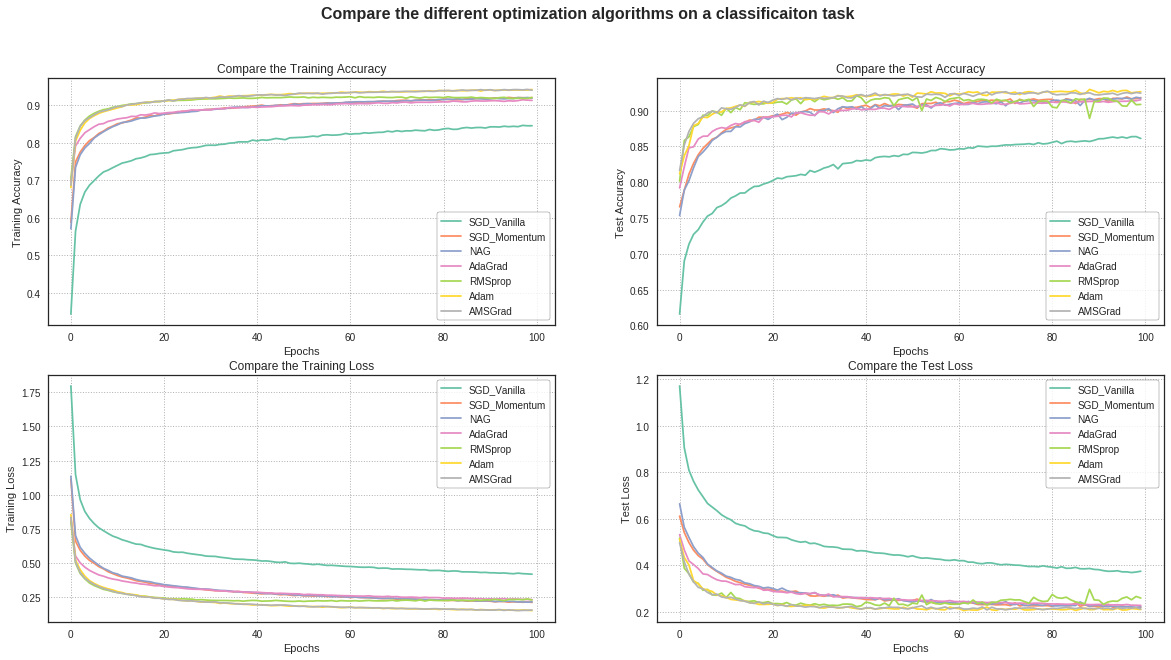

In [50]:
plt.style.use('seaborn-white')
fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(20,10))
ax1.plot(model_1_history.history['acc'],color=colors[0],label='SGD_Vanilla')
ax1.plot(model_2_history.history['acc'],color=colors[1],label='SGD_Momentum')
ax1.plot(model_3_history.history['acc'],color=colors[2],label='NAG')
ax1.plot(model_4_history.history['acc'],color=colors[3],label='AdaGrad')
ax1.plot(model_5_history.history['acc'],color=colors[4],label='RMSprop')
ax1.plot(model_6_history.history['acc'],color=colors[5],label='Adam')
ax1.plot(model_7_history.history['acc'],color=colors[7],label='AMSGrad')
ax1.legend(frameon=True,edgecolor='black')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Training Accuracy')
ax1.grid(True,color='black',linestyle='dotted',linewidth=1,alpha=.3)
ax1.set_title('Compare the Training Accuracy')


ax2.plot(model_1_history.history['val_acc'],color=colors[0],label='SGD_Vanilla')
ax2.plot(model_2_history.history['val_acc'],color=colors[1],label='SGD_Momentum')
ax2.plot(model_3_history.history['val_acc'],color=colors[2],label='NAG')
ax2.plot(model_4_history.history['val_acc'],color=colors[3],label='AdaGrad')
ax2.plot(model_5_history.history['val_acc'],color=colors[4],label='RMSprop')
ax2.plot(model_6_history.history['val_acc'],color=colors[5],label='Adam')
ax2.plot(model_7_history.history['val_acc'],color=colors[7],label='AMSGrad')
ax2.legend(frameon=True,edgecolor='black')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Test Accuracy')
ax2.grid(True,color='black',linestyle='dotted',linewidth=1,alpha=.3)
ax2.set_title('Compare the Test Accuracy')


ax3.plot(model_1_history.history['loss'],color=colors[0],label='SGD_Vanilla')
ax3.plot(model_2_history.history['loss'],color=colors[1],label='SGD_Momentum')
ax3.plot(model_3_history.history['loss'],color=colors[2],label='NAG')
ax3.plot(model_4_history.history['loss'],color=colors[3],label='AdaGrad')
ax3.plot(model_5_history.history['loss'],color=colors[4],label='RMSprop')
ax3.plot(model_6_history.history['loss'],color=colors[5],label='Adam')
ax3.plot(model_7_history.history['loss'],color=colors[7],label='AMSGrad')
ax3.legend(frameon=True,edgecolor='black')
ax3.set_xlabel('Epochs')
ax3.set_ylabel('Training Loss')
ax3.grid(True,color='black',linestyle='dotted',linewidth=1,alpha=.3)
ax3.set_title('Compare the Training Loss')

ax4.plot(model_1_history.history['val_loss'],color=colors[0],label='SGD_Vanilla')
ax4.plot(model_2_history.history['val_loss'],color=colors[1],label='SGD_Momentum')
ax4.plot(model_3_history.history['val_loss'],color=colors[2],label='NAG')
ax4.plot(model_4_history.history['val_loss'],color=colors[3],label='AdaGrad')
ax4.plot(model_5_history.history['val_loss'],color=colors[4],label='RMSprop')
ax4.plot(model_6_history.history['val_loss'],color=colors[5],label='Adam')
ax4.plot(model_7_history.history['val_loss'],color=colors[7],label='AMSGrad')
ax4.legend(frameon=True,edgecolor='black')
ax4.set_xlabel('Epochs')
ax4.set_ylabel('Test Loss')
ax4.grid(True,color='black',linestyle='dotted',linewidth=1,alpha=.3)
ax4.set_title('Compare the Test Loss')

fig.suptitle('Compare the different optimization algorithms on a classificaiton task',fontsize=16, fontweight='bold')
plt.show()